# Práctica 1. Fundamentos en Python


---



## Mínimo, máximo, media y desviación estándar tanto para el número de horas dedicadas como para las calificaciones obtenidas.

In [8]:
import numpy as np
import pandas as pd

datos = pd.read_csv("datos.csv")

print("------------ HORAS DEDICADAS ------------")
print("Mínimo =", datos["horas_dedicadas"].min())
print("Máximo = ", datos["horas_dedicadas"].max())
print("Media = ", datos["horas_dedicadas"].fillna(0).mean())
print("Desviación estandar = ", datos["horas_dedicadas"].fillna(0).std(), "\n")

print("------------ CALIFICACIONES OBTENIDAS ------------")
print("Mínimo =", datos["calificaciones_obtenida"].min())
print("Máximo = ", datos["calificaciones_obtenida"].max())
print("Media = ", datos["calificaciones_obtenida"].fillna(0).mean())
print("Desviación estandar = ", datos["calificaciones_obtenida"].fillna(0).std())

------------ HORAS DEDICADAS ------------
Mínimo = 2
Máximo =  178
Media =  99.4
Desviación estandar =  58.129075974801204 

------------ CALIFICACIONES OBTENIDAS ------------
Mínimo = 0.0
Máximo =  100.0
Media =  57.65
Desviación estandar =  37.35219996339256


## Llevar a cabo un análisis de regresión lineal utilizando estos datos y presenta un gráfico que muestre el modelo de regresión junto con los datos originales.

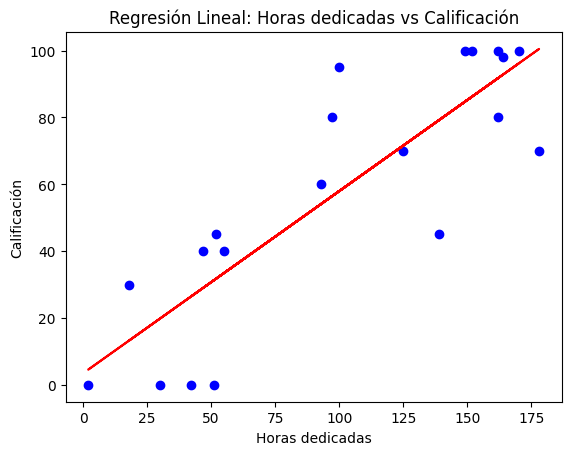

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

horas = np.array(datos["horas_dedicadas"])
calificaciones = np.array(datos["calificaciones_obtenida"].fillna(0))

horas = horas.reshape(-1, 1)

modelo = LinearRegression()
modelo.fit(horas, calificaciones)

plt.scatter(horas, calificaciones, color="blue")
plt.plot(horas, modelo.predict(horas), color="red")
plt.title("Regresión Lineal: Horas dedicadas vs Calificación")
plt.xlabel("Horas dedicadas")
plt.ylabel("Calificación")
plt.show()

## Utilizar el modelo de regresión para realizar una predicción de la calificación de un estudiante que hubiera dedicado $n$ horas en el semestre a la materia (donde $n$ es la suma de los dígitos de su número de cuenta módulo 50).

In [11]:
predic = (3 + 1 + 5 + 3 + 3 + 2 + 1 + 2 + 2) % 50

calif = modelo.predict(np.array([[predic]]))

print("Horas dedicadas = ", predic)
print("Calificación esperada = ", calif[0])

Horas dedicadas =  22
Calificación esperada =  15.46776675680054


## Investigar métodos para evaluar la bondad de ajuste del modelo y determinar cuán efectivamente explica el comportamiento de los datos.

Algunos métodos son:

* **Coeficiente de determinación (R cuadrado)**: Este es uno de los métodos más utilizados, varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos y 0 indica que el modelo no explica la variabilidad de los datos.

* **Validación cruzada**: Se dividen los datos en un conjunto de entrenamiento y un conjunto de prueba, ajustando el modelo en el conjunto de entrenamiento y evaluando su rendimiento en el conjunto de prueba.

* **AIC (Criterio de Información de Akaike)**: Penaliza la complejidad del modelo, lo que significa que favorecen modelos más simples con buen ajuste.